## Skillbox analytics

Based on the available data, it is necessary to prepare an analytical report, which in the future will help the producers of educational programs to effectively build a strategy for modernizing and improving courses. At the beginning of the report, we will draw up a capacious descriptive block for each course based on the calculated indicators. Next, we will calculate the potential load on teachers in order to assess the need to expand the staff. Then comes a two-point block on analyzing the quality of course content, where we will identify problematic modules that may need to be improved. The challenge is also to identify potential seasonality. Finally, at the end, we will develop student performance metrics to find those who are significantly worse at completing the course.

#### Codebook
courses.csv contains the following values:

     id — course ID,
     title — course name,
     field — area covered by the course.


students.csv contains the following values:

     id — student ID,
     city — student city,
     birthday — student's birthday.


course_contents.csv contains the following values:

     course_id — course ID,
     module_number — module number,
     module_title — module name,
     lesson_number — lesson number,
     lesson_title — lessson name,
     lesson_token — lesson token,
     is_video — video availability (true/false),
     is_homework — homework availability (true/false).


progresses.csv contains the following values:

     id — progress id,
     student_id — student id,
     course_id — course id,


progress_phases.csv contains the following values:

     progress_id — progress id,
     module_number — module number,
     lesson_number — lesson number,
     status — lesson progress status,
     start_date — started date,
     finish_date — finished date.


## 1. Description and initial work with data



Let's combine datasets (except students.scv) into one common one for further work. We will create a separate dataset to calculate the average age of course students (a separate dataset with students.scv is needed in order not to lose values in the main dataset due to the fact that not all students have personal data on the date of birth).

Data Description:

Count:
1. Using pandas:
- the total number of courses in the dataset;
- the number of modules in each course;
- the number of lessons in each module in each course;
- median number of lessons per module in each course;
- the number of students in each course;
- minimum, maximum, average, median age of students *(to cut off incorrect values, in this case we will set a plausible range at our discretion)*;
- minimum, maximum, average, median age of students in each course.
2. Using matplotlib or seaborn:
- Build a bar-chart showing the number of students in each course.
- Build a horizontal bar-chart showing the number of students in each course.
Based on the calculated values, describe the data (the description must be complete and cover all the metrics obtained above).

In [15]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import date
from pandas.tseries.offsets import DateOffset

In [16]:
# Load all datasets using the read_csv() method, since all files are in csv format
courses = pd.read_csv("courses.csv", index_col="Unnamed: 0")
students = pd.read_csv("students.csv")
course_contents = pd.read_csv("course_contents.csv")
progresses = pd.read_csv("progresses.csv")
progress_phases = pd.read_csv("progress_phases.csv")

In [17]:
# Using the merge() method, we merge the table, except for "students.csv"
courses_cont = courses.merge(course_contents, left_on="id", right_on="course_id")
courses_cont.drop(columns="id", axis=1, inplace=True)
main_df = courses_cont.merge(progresses, on="course_id")\
                    .merge(progress_phases, left_on=["id", "module_number", "lesson_number"], 
                           right_on=["progress_id", "module_number", "lesson_number"])
main_df.drop(columns="id", axis=1, inplace=True)
main_df.head()

,title,field,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date
0,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,done,2019-03-29 17:02:32.838469+00,2019-04-13 17:32:19.134874+00
1,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,1d874e6b6bdc34559781f65f9f761791,0c56109dde49080e7441e95b22bb73c2,done,2019-06-13 19:22:19.331201+00,2019-06-13 19:51:21.987534+00
2,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,ab7f5c720e3a5e1de00c2cdbef19fbf0,36079c0615d85f3cebfa47542b43ab41,done,2019-03-27 06:56:51.138795+00,2019-03-27 06:56:54.834751+00
3,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,29ab3f8c52a858bea2d3b9a51c433578,37384cbeb141835cc61b5fd22abd9200,done,2019-05-28 11:09:29.320478+00,2019-05-29 06:47:21.794092+00
4,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,72afe01498ba14045467fc32029b650c,3a79d622c4057c1c029c74e282e43396,done,2019-03-24 07:03:03.582679+00,2019-03-24 09:50:32.595199+00


In [18]:
# Let's get information about our merged dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          350677 non-null  object
 1   field          350677 non-null  object
 2   course_id      350677 non-null  object
 3   module_number  350677 non-null  int64 
 4   module_title   350677 non-null  object
 5   lesson_number  350677 non-null  int64 
 6   lesson_title   350677 non-null  object
 7   lesson_token   350677 non-null  object
 8   is_video       350677 non-null  bool  
 9   is_homework    350677 non-null  bool  
 10  student_id     350677 non-null  object
 11  progress_id    350677 non-null  object
 12  status         350677 non-null  object
 13  start_date     350677 non-null  object
 14  finish_date    334508 non-null  object
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


In [19]:
# total number of courses in the dataset
all_courses = list(main_df.course_id.unique())
len(all_courses)

15

In [20]:
# number of modules in each course
# group the merged dataset by the title column and use the nunique() method to count the number of unique modules
modules_in_courses = main_df.groupby("title")["module_title"].nunique().reset_index()\
                                .rename(columns={"title":"course_name", "module_title":"module_count"})\
                            .sort_values("module_count")
modules_in_courses

,course_name,module_count
4,PHP-разработчик с 0 до PRO. Часть 1,8
8,Веб-вёрстка для начинающих 2.0,8
0,Excel Базовый,9
2,Java-разработчик c нуля,9
5,SMM-маркетолог от А до Я,11
1,Java-разработчик,17
9,Веб-дизайн PRO 2.0,17
10,Веб-дизайн Базовый,17
14,Руководитель digital-проектов,17
3,JavaScript с нуля,18


In [21]:
# number of lessons in each module in each course
# similarly to the previous tasks, use the nunique() method, but group by columns title then module_title
lessons_in_modules_in_courses = main_df.groupby(["title", "module_title"])["lesson_number"].nunique()\
                                    .reset_index()\
                                .rename(columns={"title":"course_name", "module_title":"module_name", 
                                                 "lesson_number":"lesson_count"})\
                            .sort_values("lesson_count")

lessons_in_modules_in_courses


,course_name,module_name,lesson_count
158,Веб-дизайн с нуля 2.0,Бонус-модуль #2,1
186,Веб-разработчик,Дополнительные модули,1
82,UX-дизайн,Бонус-модуль. Эффектный кейс в 20 000 пикселей...,1
104,Анимация интерфейсов,Бонус-модуль. Экспорт анимации в код. Плагин B...,1
103,Анимация интерфейсов,Бонус-модуль. Практика: разбор кейса Уралсиб,1
...,...,...,...
207,Интернет-маркетолог от Ingate,Таргетированная реклама в социальных сетях,16
200,Интернет-маркетолог от Ingate,Контекстная реклама в Yandex Direct и Google A...,17
195,Интернет-маркетолог от Ingate,"SEO: больше, чем поисковая выдача (обновление ...",19
34,Java-разработчик c нуля,"Числа, строки и даты",27


In [22]:
# median number of lessons per module in each course
# group the lessons_in_modules_in_courses dataset by course names and find the median by the course_count column using aggregation
median_lessons_in_courses = lessons_in_modules_in_courses.groupby("course_name").agg({"lesson_count": "median"})
median_lessons_in_courses = median_lessons_in_courses.reset_index().rename(columns={"lesson_count":"median_count_lessons"})\
                            .sort_values("median_count_lessons")
median_lessons_in_courses


,course_name,median_count_lessons
12,Веб-разработчик,2.0
7,Анимация интерфейсов,3.0
10,Веб-дизайн Базовый,3.0
6,UX-дизайн,3.5
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
11,Веб-дизайн с нуля 2.0,4.0
0,Excel Базовый,5.0
9,Веб-дизайн PRO 2.0,5.0
14,Руководитель digital-проектов,5.0
5,SMM-маркетолог от А до Я,6.0


In [23]:
# number of students in each course
students_in_courses = main_df.groupby(["title", "field"])["student_id"].nunique()\
                                    .reset_index()\
                                .rename(columns={"title":"course_name", "student_id":"students_count"})\
                            .sort_values("students_count")

students_in_courses

,course_name,field,students_count
5,SMM-маркетолог от А до Я,Marketing,506
10,Веб-дизайн Базовый,Design,518
2,Java-разработчик c нуля,Development,581
7,Анимация интерфейсов,Design,598
12,Веб-разработчик,Development,628
14,Руководитель digital-проектов,Business,685
1,Java-разработчик,Development,763
0,Excel Базовый,Business,782
4,PHP-разработчик с 0 до PRO. Часть 1,Development,854
3,JavaScript с нуля,Development,966


In [24]:
# fill in missing values with fillna() and random. The range of years is from 1962 to 2004 since the minimum and
# maximum age for mindful learning is approximately 18 and 70 years old respectively, on average
students["birthday"].fillna(str(random.randint(1962, 2004))+\
                            "-"+str(random.randint(1, 12))+\
                            "-"+str(random.randint(1, 31)), inplace=True)
# since the column contains incorrectly specified years, we change them using the apply method and conditional operators
students["birthday"] = students["birthday"].apply(lambda x: str(random.randint(1962, 2004))+x[4:]\
                           if ((int(x[:4]) < 1962) or (int(x[:4]) > 2004))\
                           else x)
# after we've converted our column to the correct format, change the column type to datetime
students["birthday"] = pd.to_datetime(students["birthday"])


In [25]:
# Sort the dataset by the birthday column for clarity and use the same column to create a new column where we calculate the age
# students using the datetime library
students.sort_values("birthday", inplace=True)
# when calculating the age, we take into account if the student's birthday has not yet come this year, then subtract 1, otherwise subtract 0
students["age"] = date.today().year - students["birthday"].dt.year - \
                ((date.today().month < students["birthday"].dt.month) & (date.today().day < students["birthday"].dt.day))
# and finally calculate the minimum, maximum, average, median age of students using aggregation
students.agg({"age": ["min", "max", "mean", "median"]})


,age
min,18.000000
max,61.000000
mean,30.107278
median,27.000000


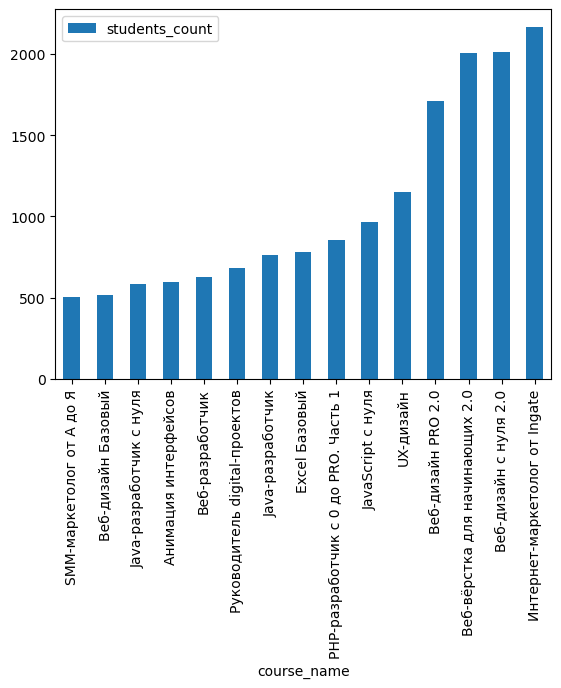

In [26]:
# apply the plot method to our students_in_courses dataset, which contains the number of students in each course, and build our graph
students_in_courses.plot(kind="bar", x="course_name", y="students_count")
plt.show()


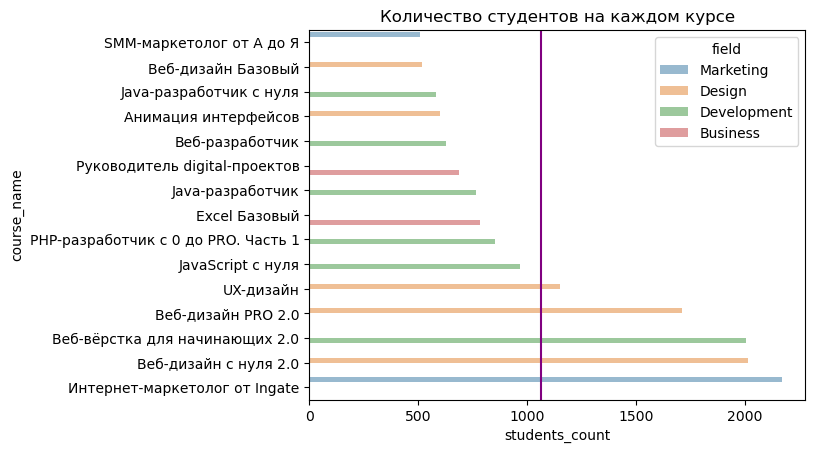

In [27]:
# for visualization, we use the seaborn library, since it is a more suitable option for this task
sns.barplot(data=students_in_courses, y="course_name", x="students_count", hue="field", alpha=0.5)
plt.title("Количество студентов на каждом курсе")
plt.axvline(students_in_courses["students_count"].mean(), color="purple")
plt.show()

- The total number of courses in the dataset is 15
- The largest number of modules contains the course "Animation of interfaces", the smallest courses "PHP-developer from 0 to PRO. Part 1", "Web layout for beginners 2.0"
- Longest course by median number of lessons "Java developer from scratch", short "Web developer"
- Top selling course "Internet Marketer by Ingate", least purchased "SMM Marketer from A to Z" both "Marketing" courses
- minimum, maximum, average, median age of students 17, 60, 38, 40 respectively
- According to the latest chart, you can see the top 3 popular areas of courses, these are Marketing, Design, Development. Less Popular Business

## 2. Calculation of the potential burden on teachers

1. Using pandas:
- Calculate the number of students in each month for each course who started their first homework in each month throughout history (each month between March 2016 and July 2019 inclusive). In this case, the calculation is based on the first homework according to the course program (not just on any work that a particular student started first). Please note that different courses have a different number of the module where this DZ is located, but at the same time you need to figure out how to concisely filter the data on this information. Here it is important not to manually write in the request where on which module the first PD lies, but to try to figure out how to optimize this process so that our solution would work even if we had not 15 courses, but 15 thousand courses, and each with its own number, where is the first DZ.
2. Using matplotlib or seaborn:
- Based on the first point, build a line-graph with the growth of students in each month for each course. 15 charts. Graphs must have titles, axes must be labeled. Ticks need to be expanded so that they are readable.
- Based on the first item, construct a line-graph with several lines showing the growth of students in each month for each course. 15 lines on the chart. Ticks need to be expanded so that they are readable. The chart must have a title. The axis reflecting the increase must be signed. The line for each course must have a different color (requires a legend). The chart should not have borders.
- Build a line-graph according to the fourth point. 15 charts. Graphs must have titles, axes must be labeled. Ticks need to be expanded so that they are readable.
- Plot one line-graph for all courses in the fourth item. 15 lines on the chart. Ticks need to be expanded so that they are readable. The chart must have a title. The axis representing the number of progresses must be labeled. The line for each course must have a different color (requires a legend). The schedule should not have frames
- Based on the calculated values, make an analytical conclusion (must be complete and cover all the metrics obtained above).

In [28]:
# copy the main dataset
load_teachers = main_df.copy()
# convert columns with dates to datetime format
load_teachers[["start_date", "finish_date"]] = load_teachers[["start_date", "finish_date"]].astype("datetime64")
# Select those lines where the lesson is homework
homeworks = load_teachers[load_teachers["is_homework"]==True]
# To find the very first homework of each course, group by course name and use aggregation to find the minimum module number
# where our very first homework is stored
first_homworks = homeworks.groupby("title").agg({"module_number": "min"}).reset_index()
first_homworks

,title,module_number
0,Excel Базовый,1
1,Java-разработчик,1
2,Java-разработчик c нуля,1
3,JavaScript с нуля,1
4,PHP-разработчик с 0 до PRO. Часть 1,1
5,SMM-маркетолог от А до Я,1
6,UX-дизайн,1
7,Анимация интерфейсов,1
8,Веб-вёрстка для начинающих 2.0,1
9,Веб-дизайн PRO 2.0,1


In [29]:
# Convert dates to month format
homeworks[['start_date', 'finish_date']] = homeworks[[
    'start_date', 'finish_date']].astype('datetime64[M]')

/var/folders/2k/8lh40zk17tlc12c8c79d98pw0000gn/T/ipykernel_91647/3759652958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homeworks[['start_date', 'finish_date']] = homeworks[[


In [30]:
# combine the dataset with the address of the first homework and students who started homework.
address_stud = first_homworks.merge(homeworks, left_on=["title", "module_number"], right_on=["title", "module_number"])
# group the combined dataset by name, year, month and find the number of unique students who started doing homework
homework_students = address_stud.groupby(["title", "start_date"])["student_id"].nunique().reset_index()
# display the result
homework_students.sort_values("student_id")


,title,start_date,student_id
184,Веб-разработчик,2016-03-01,1
187,Веб-разработчик,2018-01-01,1
185,Веб-разработчик,2017-04-01,1
88,UX-дизайн,2017-06-01,1
87,UX-дизайн,2017-05-01,1
...,...,...,...
221,Интернет-маркетолог от Ingate,2019-05-01,140
179,Веб-дизайн с нуля 2.0,2019-03-01,141
217,Интернет-маркетолог от Ingate,2019-01-01,146
176,Веб-дизайн с нуля 2.0,2018-12-01,150


Based on the first point, we will build a line-graph with the growth of students in each month for each course. 15 charts.

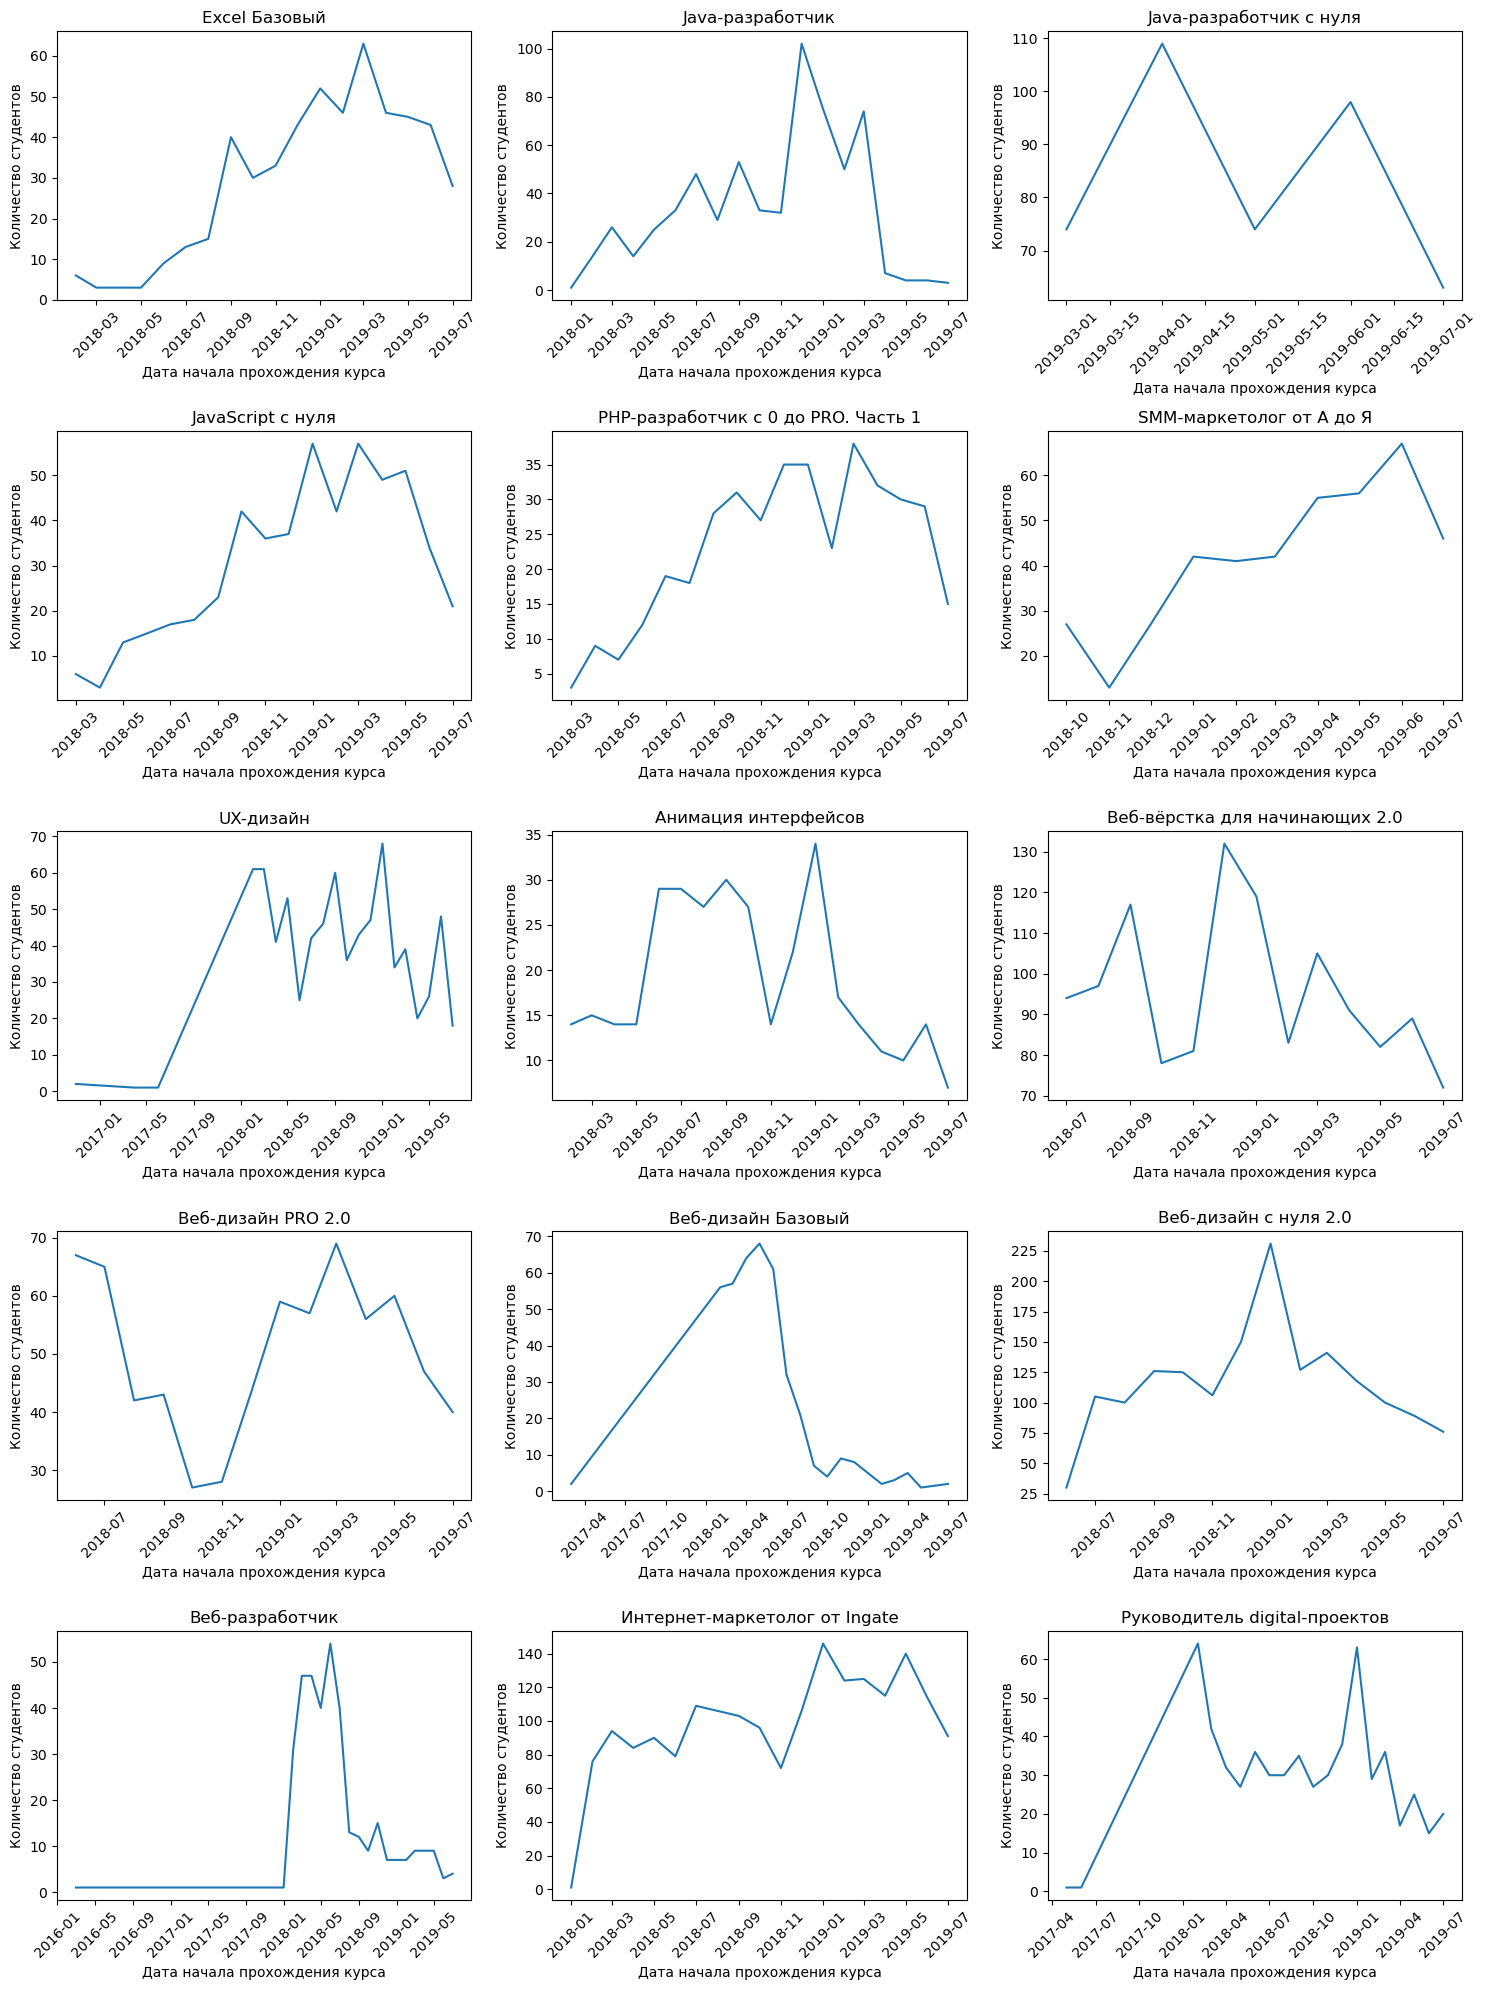

In [31]:
# First, save the names of the courses in a separate variable
titles = homework_students["title"].unique()
# Define the canvas and charts
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Display charts on the canvas
for index, ax in enumerate(axes.flat):
    sns.lineplot(data=homework_students[homework_students['title']==titles[index]],
                 x='start_date', y='student_id', ax=ax)
    
    # Axis labels and display settings
    ax.set_xlabel('Дата начала прохождения курса')
    ax.set_ylabel('Количество студентов')
    ax.set_title(titles[index])
    plt.setp(ax.get_xticklabels(), rotation=45)
    
#Automatically adjust and display the graph
fig.tight_layout()
plt.show()

Based on the first point, we will build a line-graph with several lines reflecting the growth of students in each month for each course. 15 lines on the chart. Ticks need to be expanded so that they are readable. The chart must have a title. The axis reflecting the increase must be signed. The line for each course must have a different color (requires a legend). The chart should not have borders.

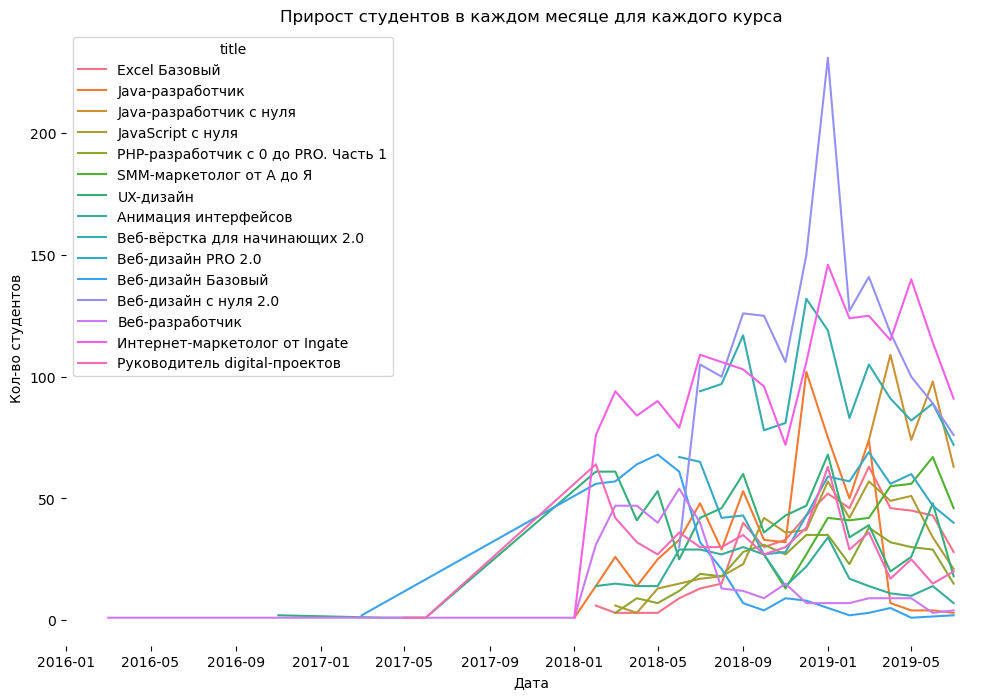

In [32]:
# Determine the size of the chart
fig, ax = plt.subplots(figsize=(12, 8))
# We build a chart where we pass the title column to the hue argument to display courses
sns.lineplot(data=homework_students, x="start_date", y="student_id", hue="title", ax=ax)
# Set the name and labels of the axis
ax.set_title("Прирост студентов в каждом месяце для каждого курса")
ax.set_xlabel("Дата")
ax.set_ylabel("Кол-во студентов")
# Remove frames
plt.box(False)
plt.show()

Calculate the number of homework progresses in each month throughout history (each month between March 2016 and July 2019 inclusive) for each course. We take into account that the completion of homework can flow from one month to another (such DZs should be included in the total number of progress for all months that the deadline for completing these DZs covers). If we do not have a finish date, then we can either consider this work as a load only in the very first month, or as a load in all months from the start of the work to the date when the dataframe was unloaded (the last occurring date in df).Thus, for each month, for each course, we need to calculate the number of homework that teachers had to check

In [33]:
# Copy the old homeworks dataset
progresses = homeworks.copy(deep=True)
# We will consider progress that does not have a finish date as a load for the first month only. To do this, fill in finish_date where
# values are NaN values from start_date of the corresponding row
progresses["finish_date"].fillna(progresses["start_date"], inplace=True)
# Convert date columns to datetime64 format
progresses[["start_date", "finish_date"]] = progresses[["start_date", "finish_date"]].astype("datetime64[M]")
# Reset the indexing as we will need it to work with the date_range() method
progresses = progresses.reset_index()
# Check our dataset
progresses.head()

,index,title,field,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date
0,2841,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,start,2019-06-01,2019-06-01
1,2842,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,1d874e6b6bdc34559781f65f9f761791,0c56109dde49080e7441e95b22bb73c2,done,2019-06-01,2019-06-01
2,2843,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,ab7f5c720e3a5e1de00c2cdbef19fbf0,36079c0615d85f3cebfa47542b43ab41,start,2019-03-01,2019-03-01
3,2844,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,29ab3f8c52a858bea2d3b9a51c433578,37384cbeb141835cc61b5fd22abd9200,done,2019-05-01,2019-06-01
4,2845,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,e8d90fa64a43ebf9a13fa32d128098bc,e8be94e53115096efe668ed944e9b52b,start,2019-03-01,2019-03-01


In [34]:
# Further, for progress that started in one and flowing to other months, use the apply method, lambda function
# and the date_range() method with which we get a list of months between start_date and finish_date and save them as a list
# to a new date column
progresses["date"] = progresses.apply(
    
    lambda x: list(
        pd.date_range(
            x.start_date, 
            x.finish_date,
            freq=pd.offsets.MonthBegin()
        )
    ),
    axis = 1
    
)
# Now we have a dataset with a new column where the months for each progress are stored in the form of a list
progresses.head()

,index,title,field,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date,date
0,2841,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,start,2019-06-01,2019-06-01,[2019-06-01 00:00:00]
1,2842,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,1d874e6b6bdc34559781f65f9f761791,0c56109dde49080e7441e95b22bb73c2,done,2019-06-01,2019-06-01,[2019-06-01 00:00:00]
2,2843,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,ab7f5c720e3a5e1de00c2cdbef19fbf0,36079c0615d85f3cebfa47542b43ab41,start,2019-03-01,2019-03-01,[2019-03-01 00:00:00]
3,2844,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,29ab3f8c52a858bea2d3b9a51c433578,37384cbeb141835cc61b5fd22abd9200,done,2019-05-01,2019-06-01,"[2019-05-01 00:00:00, 2019-06-01 00:00:00]"
4,2845,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,e8d90fa64a43ebf9a13fa32d128098bc,e8be94e53115096efe668ed944e9b52b,start,2019-03-01,2019-03-01,[2019-03-01 00:00:00]


In [35]:
# Next, we need to populate the dataframe by expanding the dates from the date column. The explode function will help us with this.
progress_result = progresses.explode(column="date", ignore_index=True).\
                    groupby(["title", "date"]).agg({"progress_id": "count"}).\
                    reset_index().rename(columns={"progress_id": "progress_count"})
# Finally, we calculated the number of homework progresses in each month throughout history
progress_result


,title,date,progress_count
0,Excel Базовый,2018-02-01,37
1,Excel Базовый,2018-03-01,7
2,Excel Базовый,2018-04-01,13
3,Excel Базовый,2018-05-01,17
4,Excel Базовый,2018-06-01,37
...,...,...,...
253,Руководитель digital-проектов,2019-03-01,385
254,Руководитель digital-проектов,2019-04-01,284
255,Руководитель digital-проектов,2019-05-01,291
256,Руководитель digital-проектов,2019-06-01,231


Let's build a line-graph on the fourth point. 15 charts. Graphs must have titles, axes must be labeled. Ticks need to be expanded so that they are readable.

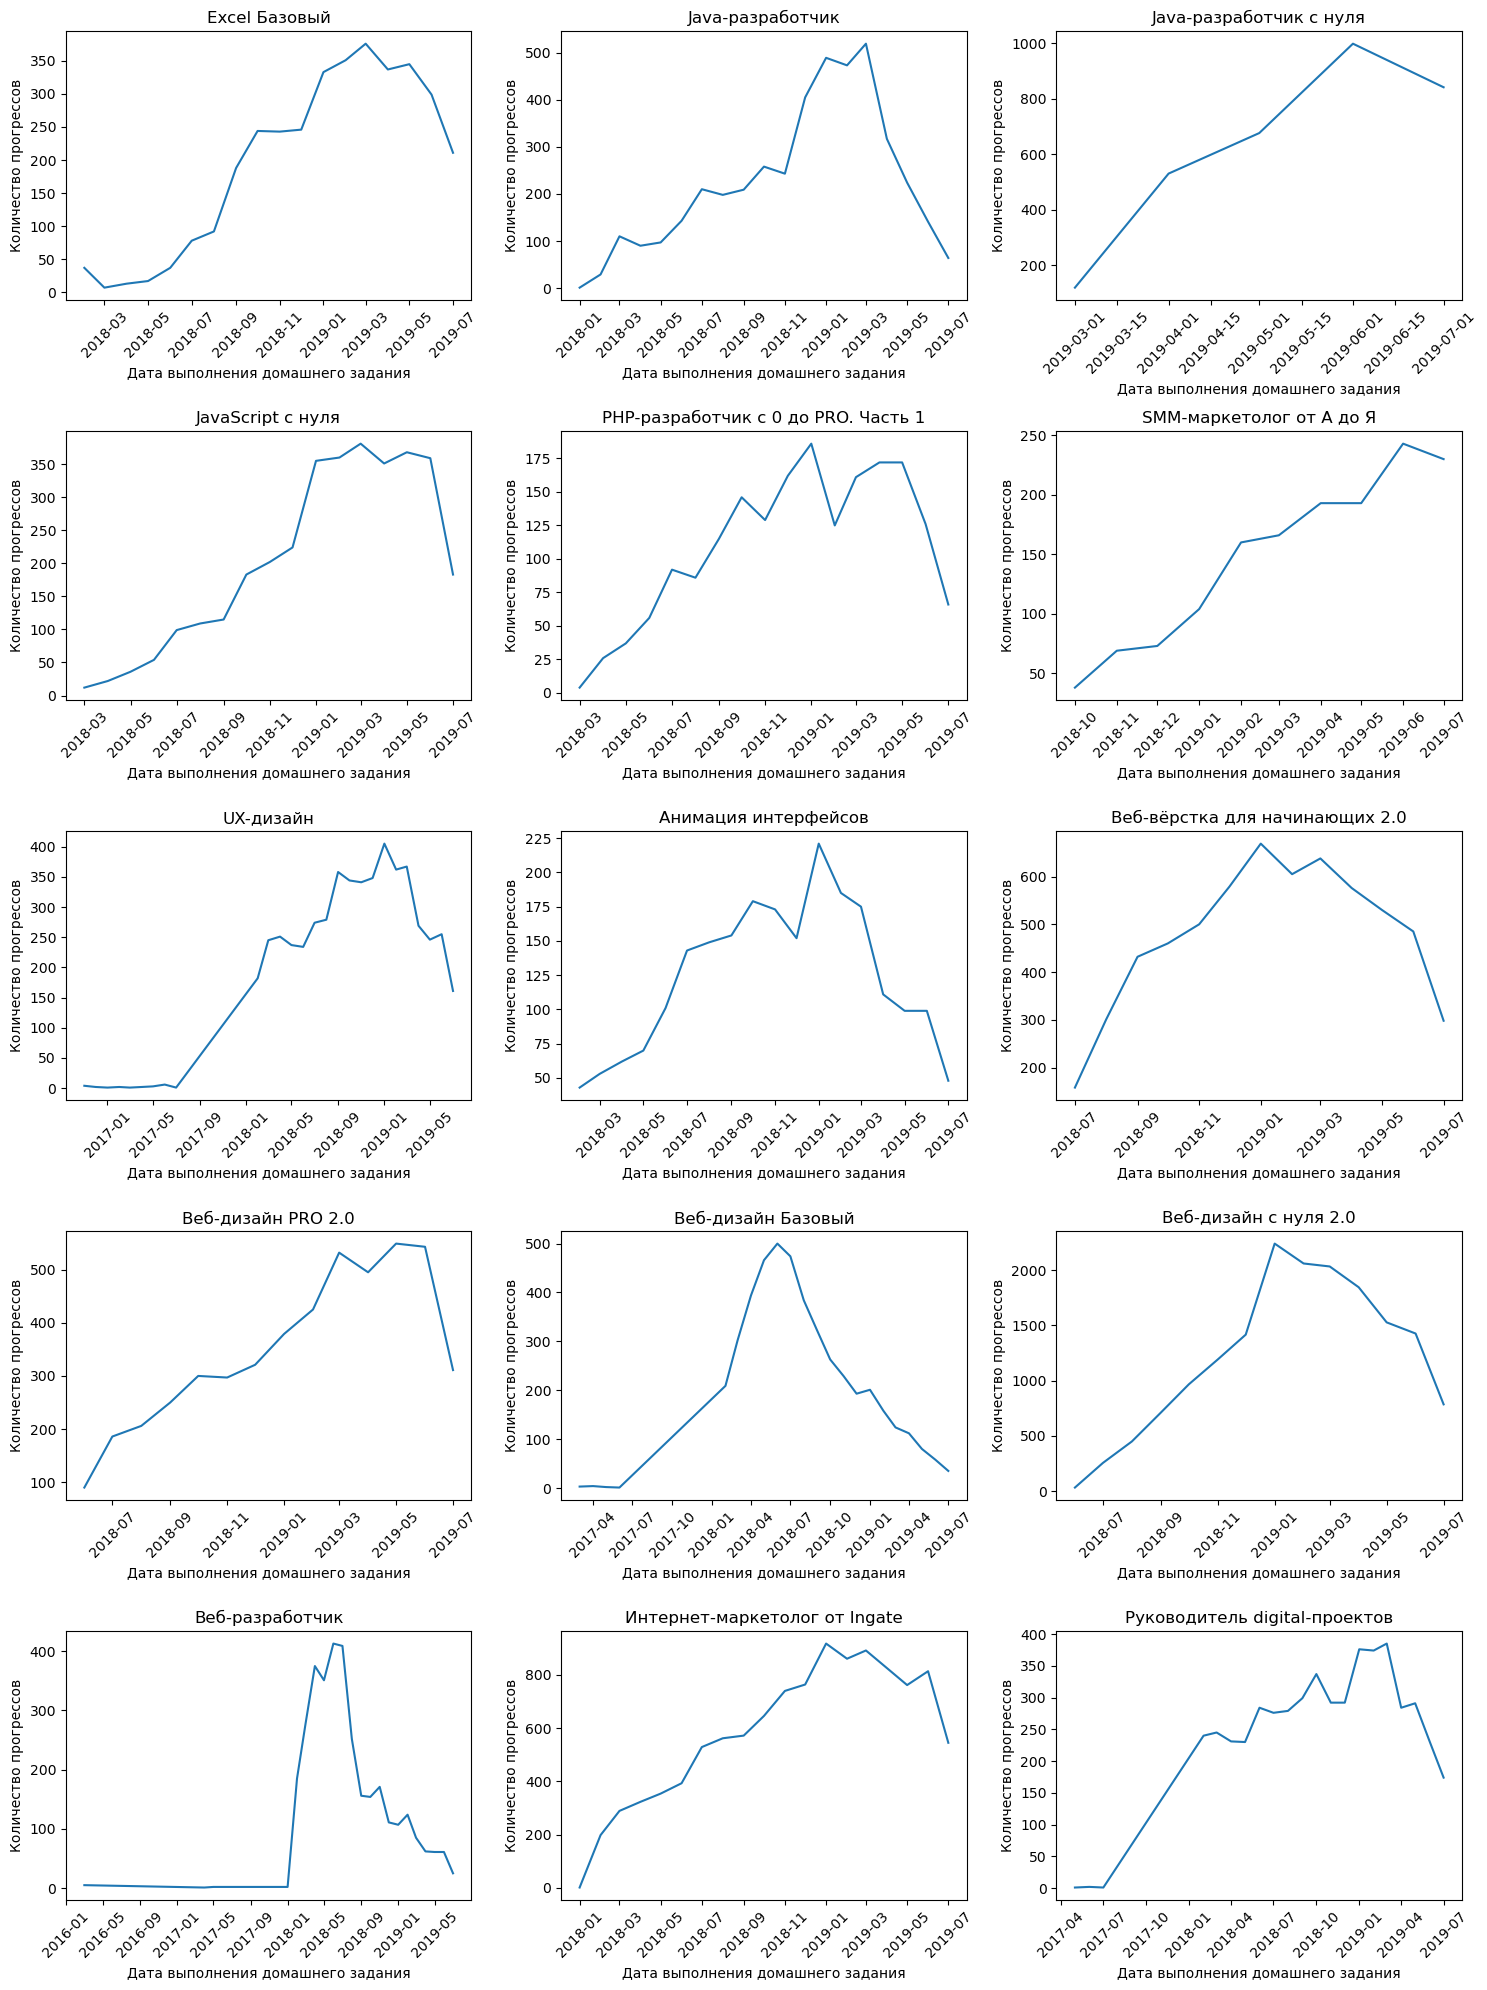

In [36]:
# First, save the names of the courses in a separate variable
titles = progress_result["title"].unique()
# Define the canvas and charts
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Display charts on the canvas
for index, ax in enumerate(axes.flat):
    sns.lineplot(data=progress_result[progress_result['title']==titles[index]],
                 x='date', y='progress_count', ax=ax)
    
    # Axis labels and display settings
    ax.set_xlabel('Дата выполнения домашнего задания')
    ax.set_ylabel('Количество прогрессов')
    ax.set_title(titles[index])
    plt.setp(ax.get_xticklabels(), rotation=45)
    
#Automatically adjust and display the graph
fig.tight_layout()
plt.show()

Let's build one line-graph for all courses on the fourth point. 15 lines on the chart.

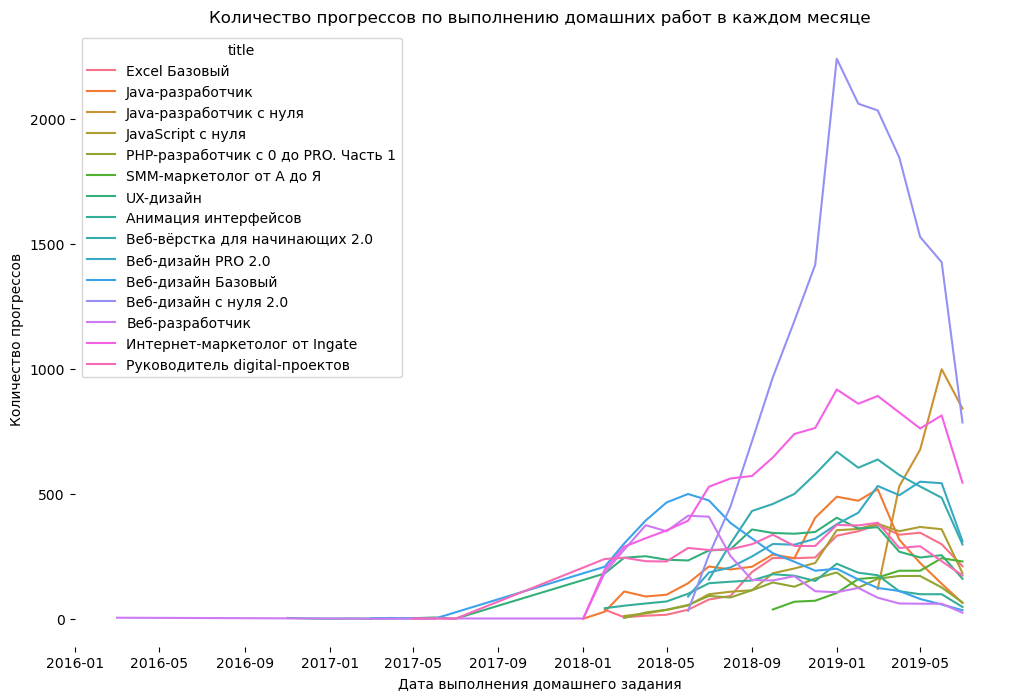

In [37]:
# Set the size of the chart
fig, ax = plt.subplots(figsize=(12, 8))
# With the help of seaborn we will build a graph
sns.lineplot(data=progress_result, x="date", y="progress_count", hue="title", ax=ax)
# Write the title
ax.set_title("Количество прогрессов по выполнению домашних работ в каждом месяце")
# Sign the axes
ax.set_xlabel('Дата выполнения домашнего задания')
ax.set_ylabel('Количество прогрессов')
# Remove chart frame
plt.box(False)
plt.show()

Based on the calculated values, make an analytical conclusion (must be complete and cover all the metrics obtained above).

- The most progressive increase in the implementation of DD among students of the courses "Web design from scratch 2.0" and "Internet marketer from Ingate"
- The least progressive students in the implementation of PD belong to the courses "PHP Developer from 0 to PRO. Part 1" and "Interface Animation"
- The largest number of DZ progresses in the courses "Web design from scratch" and "Java developer from scratch"
- The smallest number of progresses in the DZ in the courses "PHP-developer from 0 to PRO" and "Interface animation"
- You can also notice the activity in the implementation of the DZ of students enrolled in courses related to Web design. That is, this may indicate that the teachers of these courses are under a relatively large load.

## 3. Identification of problem modules

1. Using pandas and matplotlib or seaborn:
- Calculate the minimum, maximum, average, median time to complete each module (the difference between the start and end time of homework) for each course. If there are several homework assignments in the module, then calculate the difference between the start time of the first homework and the end time of the last homework in the module. It makes sense to delete entries without a finish date for this item
- Based on the first item, build a line-graph with the median time to complete each module for each course. 15 charts. Charts should have titles
- To identify seasonality, calculate the median monthly homework time (12 months, January-December) for each course. That is, calculate for each month, the median time to complete the work that was started in that month.
- Based on the third point, build a line-graph on which lines will be plotted for each course with median homework time by month. 15 lines on the chart. The chart must have a title. The axis reflecting the transit time must be labeled. The line for each course must have a different color (requires a legend). The chart should not have borders.
- Based on the calculated values, draw an analytical conclusion (must be complete and cover all the metrics obtained above)

In [39]:
# For convenience, we create a new dataset where remote sensing is stored
problem_mod = main_df[main_df["is_homework"]==True]
# Since we only have missing values in the "finish_date" column, discard the missing values
problem_mod = problem_mod.dropna()
# Convert date columns to datetime64[D] format
problem_mod[["start_date", "finish_date"]] = problem_mod[["start_date", "finish_date"]].astype("datetime64[D]")
# Calculate the difference between start_date and finish_date and take the days from there
problem_mod["delta"] = (problem_mod['finish_date'] - problem_mod['start_date']).dt.days
# We group the dataset by the name of the course and module and display the result using aggregation
problem_mod_result = problem_mod.groupby(["title", "module_title"])\
                                .agg(min_time = ('delta', 'min'),
                                                             max_time = ('delta', 'max'),
                                                             mean_time = ('delta', 'mean'),
                                                             median_time = ('delta', 'median'))\
                                .reset_index()
problem_mod_result


,title,module_title,min_time,max_time,mean_time,median_time
0,Excel Базовый,Визуализация данных Excel,0,175,10.055000,5.0
1,Excel Базовый,Основной функционал Excel,0,184,6.139738,2.0
2,Excel Базовый,Основной функционал Excel (продолжение),0,185,4.453202,2.0
3,Excel Базовый,Сводные таблицы Excel,0,239,9.602151,3.0
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,0,176,7.459259,3.0
...,...,...,...,...,...,...
185,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,0,212,21.454545,7.0
186,Руководитель digital-проектов,Требовательность digital-продюсера,0,397,17.762319,8.0
187,Руководитель digital-проектов,Управление временем,0,164,7.883721,4.0
188,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,0,199,14.812500,8.0


Based on the first point, we will build a line-graph with the median time to complete each module for each course. 15 charts. Charts should have titles

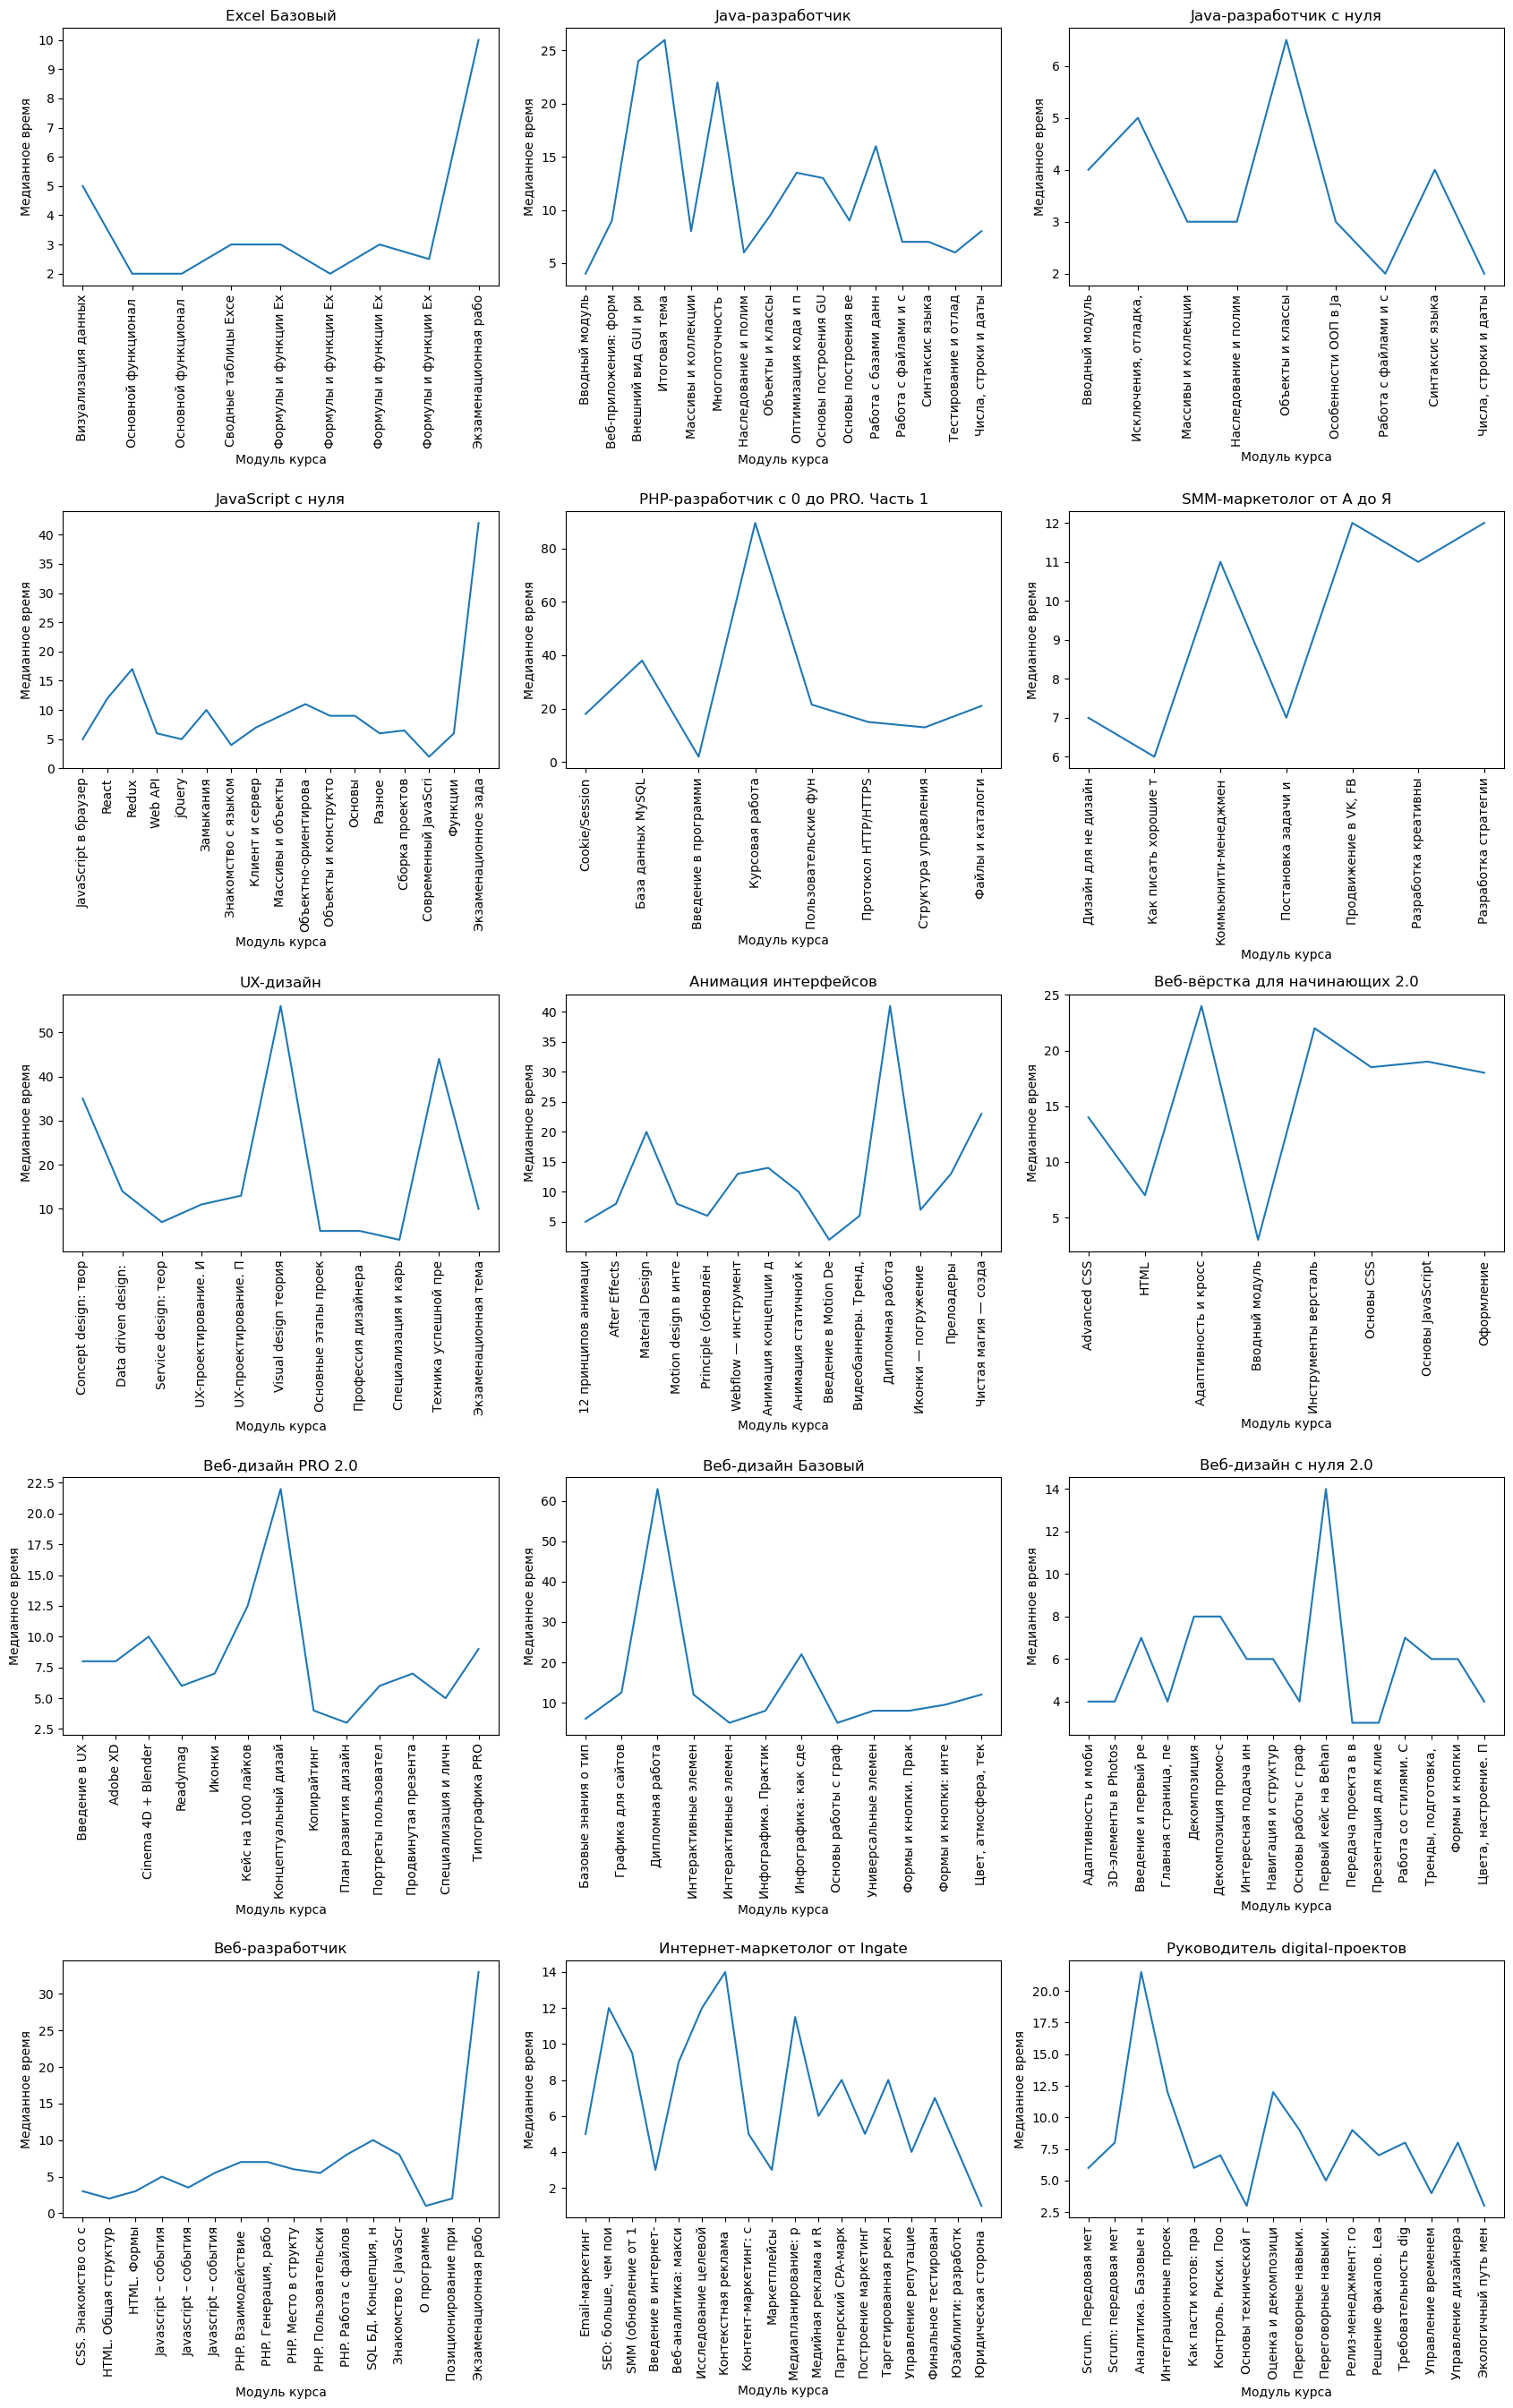

In [40]:
# For convenience, display median values in a separate dataframe
median_time = problem_mod_result[["title", "module_title", "median_time"]]
#Here we can get a warning, for convenience, we will immediately filter them
import warnings
warnings.filterwarnings("ignore")
#Mark up the canvas and charts
fig, axes = plt.subplots(5, 3, figsize=(17, 27))

#For each course, display the corresponding schedule
for index, ax in enumerate(axes.flat):
    sns.lineplot(data=median_time[median_time['title'] == titles[index]],
                 x='module_title', y='median_time', ax=ax)
    
    #Slightly truncate the names of the modules, for a more compact layout
    ax.set_xticklabels(median_time.loc[median_time['title']==titles[index], 
     'module_title'].apply( lambda x: x[:20]), rotation=90)
    
    #Sign graphs and coordinate axes
    ax.set_title(titles[index])
    ax.set_xlabel('Модуль курса')
    ax.set_ylabel('Медианное время')
    
# Align the graphs on the canvas and call them
fig.tight_layout()
plt.show()

 To identify seasonality, calculate the median monthly homework time (12 months, January-December) for each course. That is, calculate for each month, the median time to complete the work that was started in that month.

In [41]:
monthly_median = problem_mod.copy(deep=True)
monthly_median["start_date"] = monthly_median["start_date"].astype("datetime64[M]")
# Determining the start month for homework
monthly_median['homework_month'] = monthly_median['start_date'].apply(lambda x: date(2020, x.month, 1))

# Display median homework time by month
median_monthly_median = monthly_median.pivot_table(values="delta", index='homework_month', columns='title', aggfunc=np.median)
median_monthly_median = median_monthly_median.reset_index()
median_monthly_median = median_monthly_median.set_index("homework_month")
median_monthly_median


title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
homework_month,,,,,,,,,,,,,,,
2020-01-01,2.0,6.0,NaN,7.0,12.0,12.0,10.0,7.0,9.0,10.0,9.0,6.0,6.0,6.0,6.0
2020-02-01,2.0,5.0,NaN,6.0,8.5,10.0,4.0,3.0,9.0,9.0,1.0,6.0,3.5,4.0,2.0
2020-03-01,3.0,7.0,7.0,6.0,10.5,11.0,10.0,8.0,8.0,7.0,12.0,5.0,11.0,7.0,7.0
2020-04-01,2.0,9.0,3.0,5.0,11.0,8.0,9.0,6.0,9.5,7.0,9.0,4.0,3.0,7.0,7.0
2020-05-01,3.0,9.0,3.0,5.0,9.0,10.0,8.0,6.5,8.0,5.0,7.0,4.0,2.0,8.0,7.0
2020-06-01,2.0,7.0,3.0,5.0,9.0,7.0,6.0,5.0,5.5,5.0,7.0,4.0,1.0,6.0,6.0
2020-07-01,2.0,6.0,2.0,6.0,6.0,5.0,6.0,6.0,3.0,8.0,8.0,3.0,2.0,4.0,6.0
2020-08-01,4.0,14.0,NaN,8.0,13.5,NaN,10.0,4.0,8.0,31.0,12.0,7.0,5.0,7.0,14.0
2020-09-01,2.0,11.0,NaN,12.0,10.5,NaN,11.0,8.0,10.0,27.0,14.0,8.0,8.0,5.0,10.0


Based on the third point, build a line-graph on which lines will be plotted for each course with median homework time by month. 15 lines on the chart. The chart must have a title. The axis reflecting the transit time must be labeled. The line for each course must have a different color (requires a legend). The chart should not have borders.

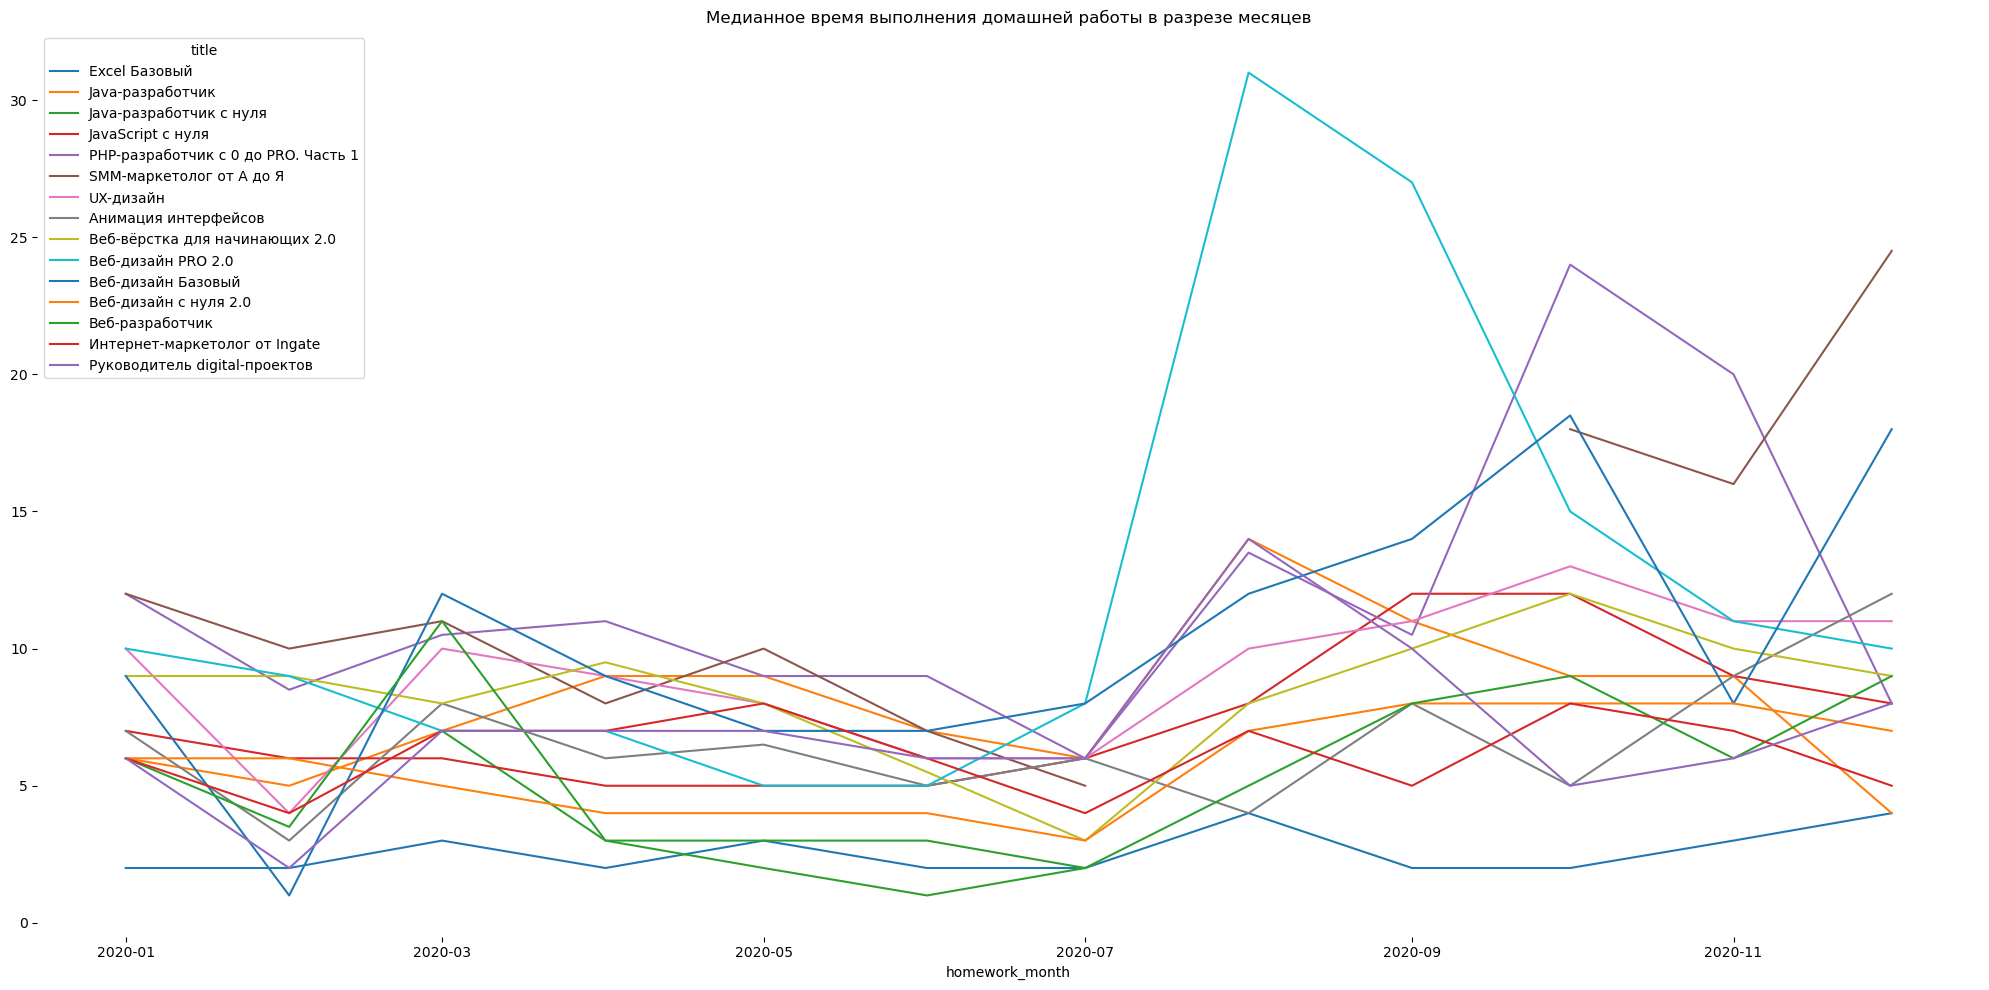

In [42]:
# Create basic chart objects
fig, ax = plt.subplots(figsize=(20, 10))

# Display the chart on the page
median_monthly_median.plot(ax=ax,title='Медианное время выполнения домашней работы в разрезе месяцев')

#Customize the display and display the graph
plt.tight_layout()
plt.box(False)
plt.show()

Based on the calculated values, we will draw an analytical conclusion (must be complete and cover all the metrics obtained above)

- The schedule of students of Excel Basic, Javascript from Scratch and Web Development courses is quite stable, meaning that they spend almost the same amount of time on DZ, but a relatively sharp jump is recorded in the last module, i.e. students need a long time to pass last module
- The time to complete the modules on the course "Java developer" progresses with each module. Perhaps this is due to the fact that at the beginning it is difficult for students to understand fundamental topics, but in subsequent modules, progress is noticed in passing the course.
- Students of the courses "Java developer from scratch", "Internet marketer from Ingate", "Head of digital projects" find it most difficult until the middle of the course
- The longest median time to complete each module belongs to the courses: "PHP developer from 0 to PRO" and "Web design basic"

- Monthly anomaly seen in January and July
- The decline in the implementation of DZ goes from March to July, then the schedule begins to grow, which means that students begin to progress

## 4. Calculation of conversion

1. Using pandas:
- Calculate the conversion of students moving from one module to another in each course. Formula: the ratio of the number of students who started doing homework in this module (if there are several homework assignments in the module, then count according to the first homework assignment in the module), to the number of students who passed the assignment in the previous module (if there are several homework assignments in the module, then count according to the last DZ in the module).
2. Using matplotlib or seaborn:
- Build a bar-chart showing the conversion rate of students from one module to another in each course. The chart must have a title. Ticks need to be expanded so that they are readable.
- Based on the calculated values, make an analytical conclusion (must be complete and cover all the metrics obtained above).

In [44]:
# Counting the number of students who started homeschooling in modules
# To do this, take all the lessons that are DZ and group
# do aggregation where we take the very first lesson number and count the unique number of students
# reset the index and rename the column name for convenience
started_mods = main_df[main_df["is_homework"]==True]\
                         .groupby(["title", "module_number", "module_title"])\
                         .agg({"lesson_number": "min", "student_id": "nunique"})\
                         .reset_index().rename(columns={"student_id": "started_count"})
started_mods.head()

,title,module_number,module_title,lesson_number,started_count
0,Excel Базовый,1,Основной функционал Excel,11,518
1,Excel Базовый,2,Основной функционал Excel (продолжение),7,434
2,Excel Базовый,3,Формулы и функции Excel. Введение,3,398
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,7,345
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,5,298


In [45]:
# We count the number of students who have completed DL in modules
# Filter by status where it is completed and all lessons that are DD and group
# aggregate where we take the latest lesson number and count the unique number of students
# reset the index and rename the column name for convenience
finished_mods = main_df[(main_df["status"]=="done")&(main_df["is_homework"]==True)]\
                         .groupby(["title", "module_number", "module_title"])\
                         .agg({"lesson_number": "max", "student_id": "nunique"})\
                         .reset_index().rename(columns={"student_id": "finished_count"})
# display the result
finished_mods.head()

,title,module_number,module_title,lesson_number,finished_count
0,Excel Базовый,1,Основной функционал Excel,11,458
1,Excel Базовый,2,Основной функционал Excel (продолжение),7,406
2,Excel Базовый,3,Формулы и функции Excel. Введение,3,387
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,7,303
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,5,270


In [46]:
# Merge the two received datasets into one
conversion = started_mods.merge(finished_mods, how="left")
# display the result
conversion

,title,module_number,module_title,lesson_number,started_count,finished_count
0,Excel Базовый,1,Основной функционал Excel,11,518,458.0
1,Excel Базовый,2,Основной функционал Excel (продолжение),7,434,406.0
2,Excel Базовый,3,Формулы и функции Excel. Введение,3,398,387.0
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,7,345,303.0
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,5,298,270.0
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,5,95,88.0
187,Руководитель digital-проектов,13,Интеграционные проекты.,4,87,69.0
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,7,71,64.0
189,Руководитель digital-проектов,15,Основы технической грамотности,12,66,64.0


In [47]:
# Use the shift() method to move one line below the finished_count column
conversion["finished_count"] = conversion["finished_count"].shift(1)
# display the result
conversion

,title,module_number,module_title,lesson_number,started_count,finished_count
0,Excel Базовый,1,Основной функционал Excel,11,518,NaN
1,Excel Базовый,2,Основной функционал Excel (продолжение),7,434,458.0
2,Excel Базовый,3,Формулы и функции Excel. Введение,3,398,406.0
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,7,345,387.0
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,5,298,303.0
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,5,95,98.0
187,Руководитель digital-проектов,13,Интеграционные проекты.,4,87,88.0
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,7,71,69.0
189,Руководитель digital-проектов,15,Основы технической грамотности,12,66,64.0


In [48]:
# And finally calculate the conversion
conversion["conv"] = conversion["started_count"] / conversion["finished_count"]
# display the result
conversion

,title,module_number,module_title,lesson_number,started_count,finished_count,conv
0,Excel Базовый,1,Основной функционал Excel,11,518,NaN,NaN
1,Excel Базовый,2,Основной функционал Excel (продолжение),7,434,458.0,0.947598
2,Excel Базовый,3,Формулы и функции Excel. Введение,3,398,406.0,0.980296
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,7,345,387.0,0.891473
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,5,298,303.0,0.983498
...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,5,95,98.0,0.969388
187,Руководитель digital-проектов,13,Интеграционные проекты.,4,87,88.0,0.988636
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,7,71,69.0,1.028986
189,Руководитель digital-проектов,15,Основы технической грамотности,12,66,64.0,1.031250


In [49]:
# Next, set the title and module_title columns as indexes to remove the first rows of each module,
# because we can't calculate the conversion for the first lesson of the module
conversion.set_index(["title", "module_title"], inplace=True)
for i in list(titles):
    conversion.drop(index = conversion.loc[i].index[0], level = 1, inplace = True)

In [50]:
# you can see that there are missing values in our dataset
conversion.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 173 entries, ('Excel Базовый', 'Основной функционал Excel (продолжение)') to ('Руководитель digital-проектов', 'Контроль. Риски. Поощрения. Наказания. Обратная связь.')
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   module_number   173 non-null    int64  
 1   lesson_number   173 non-null    int64  
 2   started_count   173 non-null    int64  
 3   finished_count  165 non-null    float64
 4   conv            165 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 13.5+ KB


In [51]:
# fill in missing values ​​with zeros
conversion.fillna(0, inplace=True)
conversion.reset_index(inplace=True)
# Get the result
conversion

,title,module_title,module_number,lesson_number,started_count,finished_count,conv
0,Excel Базовый,Основной функционал Excel (продолжение),2,7,434,458.0,0.947598
1,Excel Базовый,Формулы и функции Excel. Введение,3,3,398,406.0,0.980296
2,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,7,345,387.0,0.891473
3,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5,5,298,303.0,0.983498
4,Excel Базовый,"Формулы и функции Excel. Работа с ошибками, пр...",6,5,263,270.0,0.974074
...,...,...,...,...,...,...,...
168,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,12,5,95,98.0,0.969388
169,Руководитель digital-проектов,Интеграционные проекты.,13,4,87,88.0,0.988636
170,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,14,7,71,69.0,1.028986
171,Руководитель digital-проектов,Основы технической грамотности,15,12,66,64.0,1.031250


Let's build a bar-chart that reflects the conversion of students from one module to another in each course. The chart must have a title. Ticks need to be expanded so that they are readable.

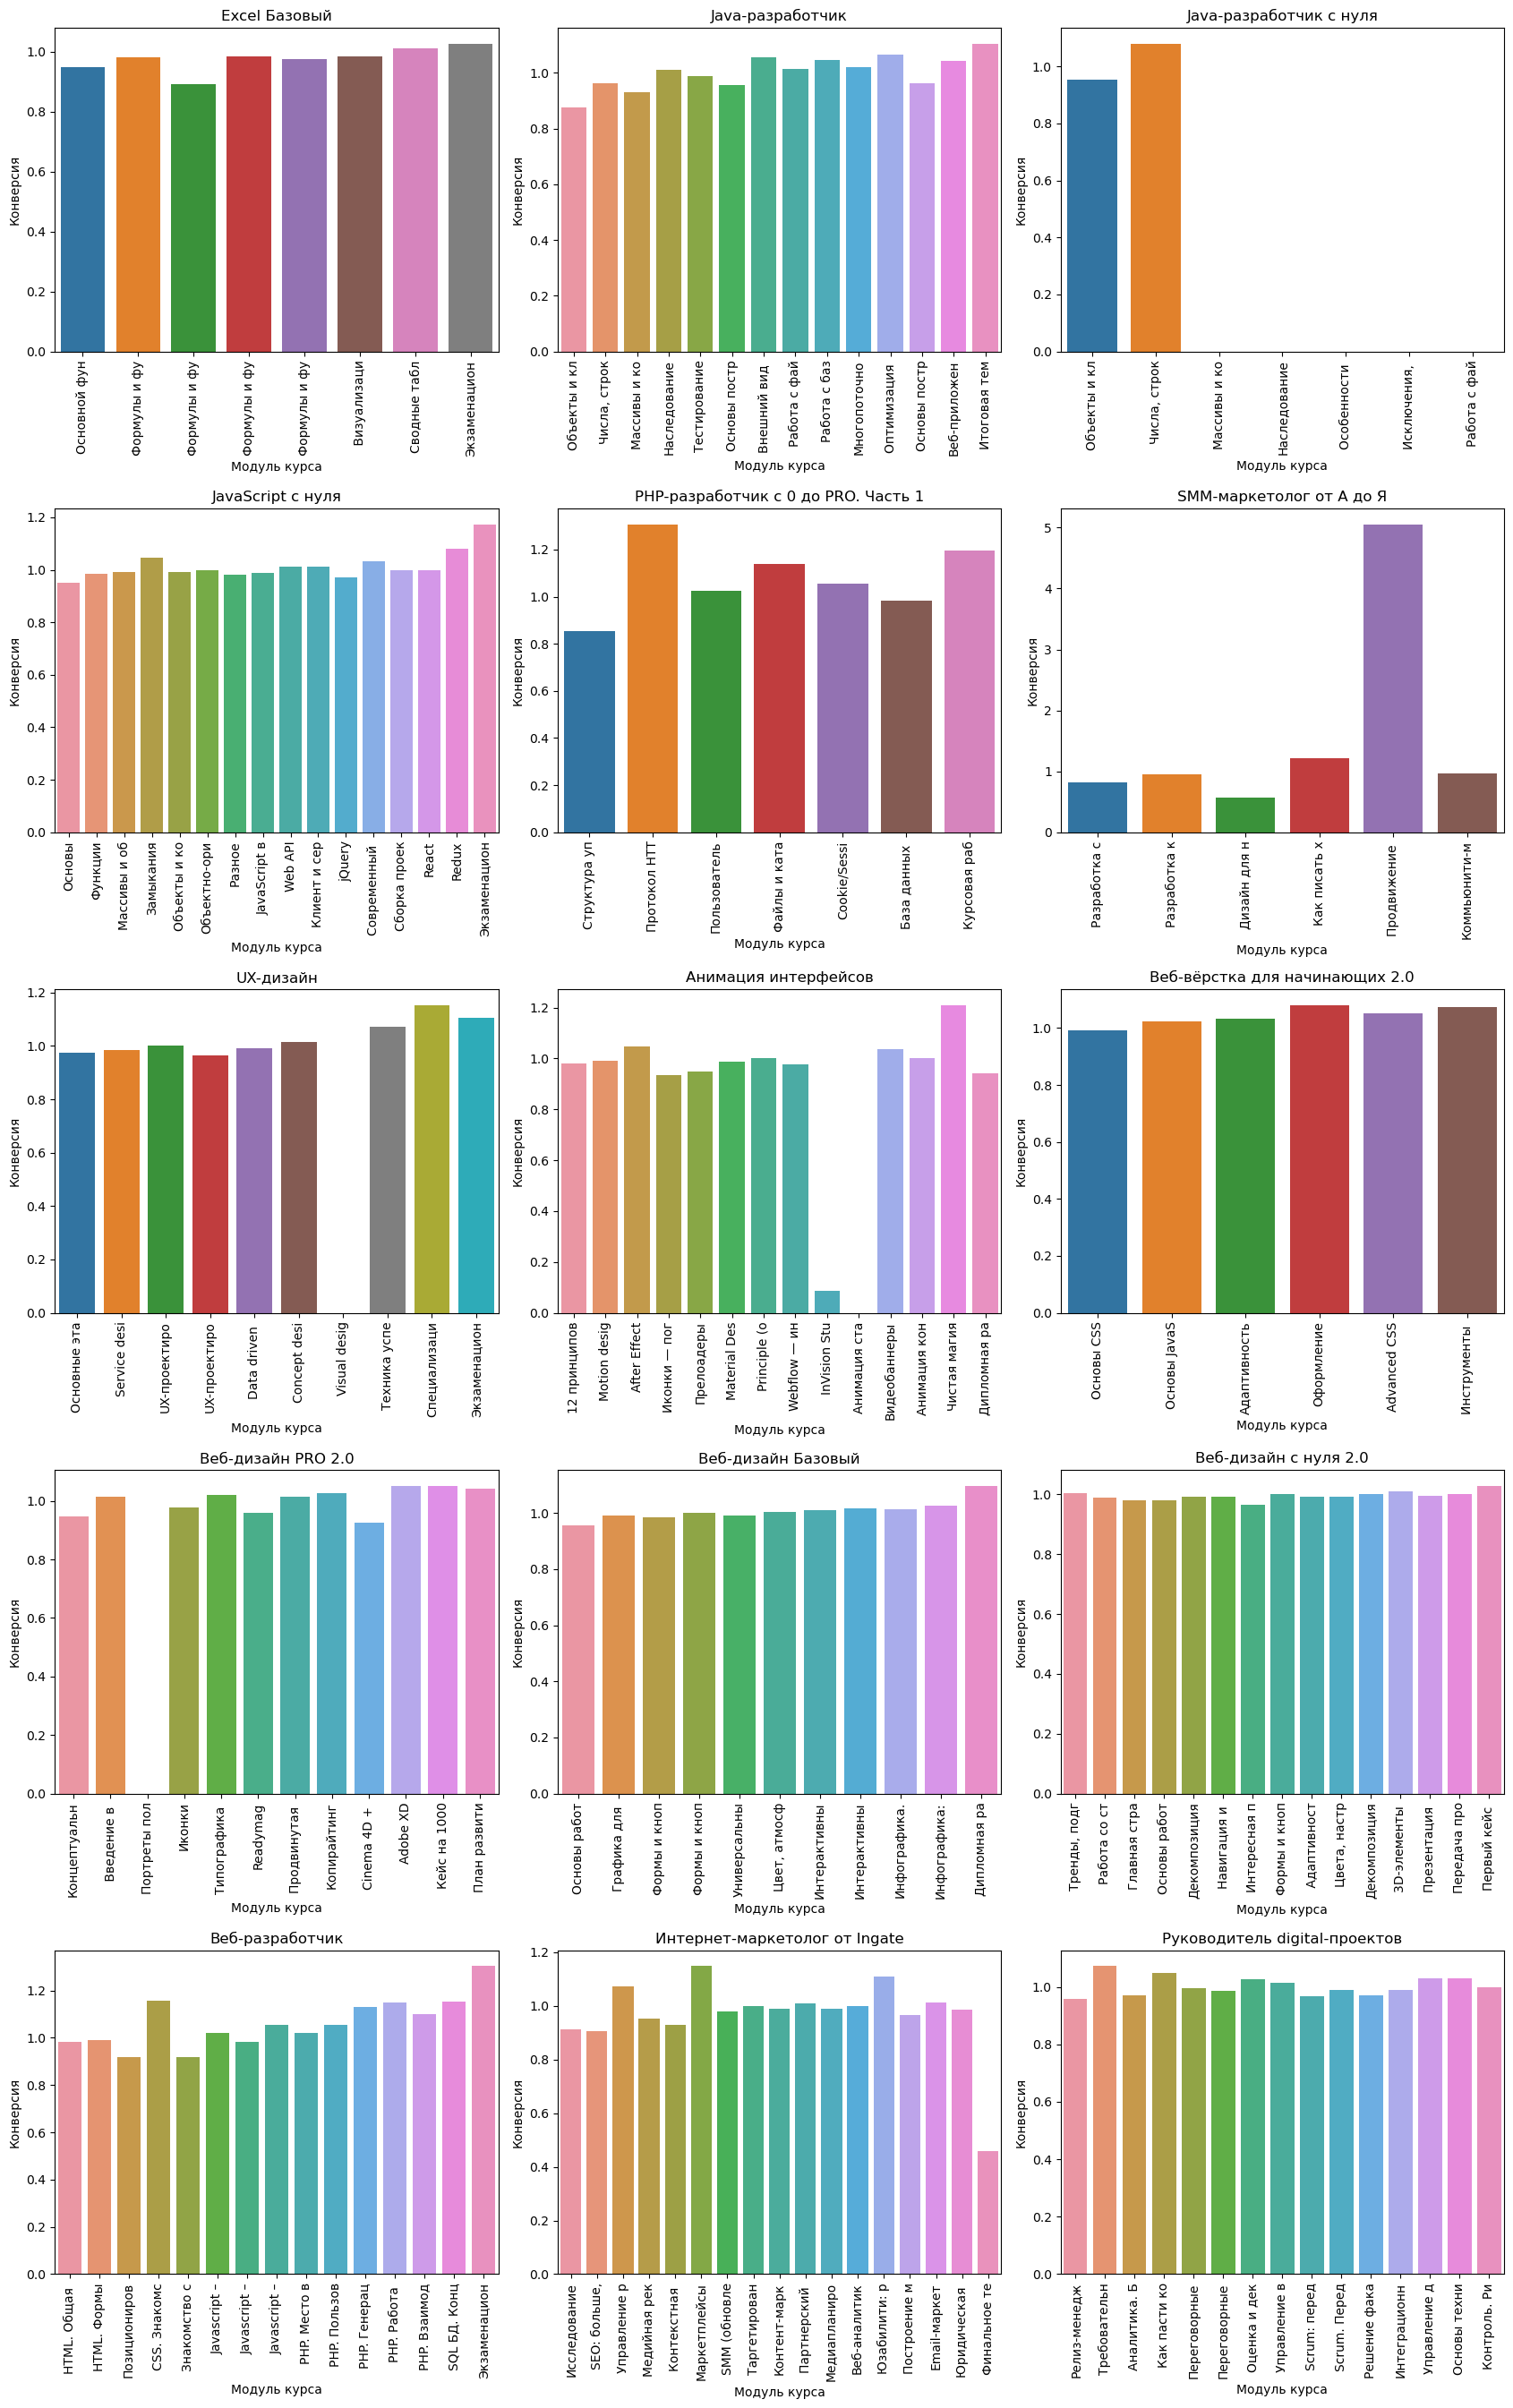

In [52]:
#Here we can get a warning, for convenience, we will immediately filter them
import warnings
warnings.filterwarnings("ignore")
#Mark up the canvas and charts
fig, axes = plt.subplots(5, 3, figsize=(17, 27))

#For each course, display the corresponding schedule
for index, ax in enumerate(axes.flat):
    sns.barplot(data=conversion[conversion['title'] == titles[index]],
                 x='module_title', y='conv', ax=ax)
    
    #Slightly truncate the names of the modules, for a more compact layout
    ax.set_xticklabels(conversion.loc[conversion['title']==titles[index], 
     'module_title'].apply( lambda x: x[:12]), rotation=90)
    
    #Sign graphs and coordinate axes
    ax.set_title(titles[index])
    ax.set_xlabel('Модуль курса')
    ax.set_ylabel('Конверсия')
    
# Align the graphs on the canvas and call them
fig.tight_layout()
plt.show()

Based on the calculated values, an analytical conclusion was made (should be complete and cover all the metrics obtained above).

- The largest positive anomaly in conversion is observed on the course "SMM marketer from A to Z" in the module "Promotion in VK, FB, MyTarget", more than 500%, this module was probably added late, respectively, students completed it according to some time has passed since the passage of the main part, due to which the conversion has acquired such indicators
-The greatest negative anomaly is observed in the course "Animation of interfaces". On the module "13. Animating a static concept", the conversion reaches zero, it is likely that students had difficulty completing tasks in the previous module, InVisio Studio
-Otherwise, the conversion in other courses fluctuates without serious anomalies